In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:/Users/103467/python/CarData_norm.csv")

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,Age-cat,MSRP
0,0.074074,0.296832,0.802883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10.133409
1,0.074074,0.296832,0.802883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10.083724
2,0.074074,0.198187,0.875557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10.287729
3,0.074074,0.296832,0.802883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9.998570
4,0.074074,0.296832,0.802883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10.189606


In [5]:
y = df["MSRP"]
X = df.drop(["MSRP"],axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X["Age-cat"], test_size=0.2, random_state=42)

In [7]:
X_test["Age-cat"].value_counts(normalize=True)

1    0.478814
3    0.157839
2    0.136653
4    0.099576
5    0.077331
6    0.049788
Name: Age-cat, dtype: float64

In [8]:
X_train = X_train.drop(["Age-cat"],axis=1)
X_test = X_test.drop(["Age-cat"],axis=1)

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
for feat, targ in train_dataset.take(1):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.037 0.241 0.856 0.    0.    0.    0.    1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.    0.
 0.    1.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    1.    0.    0.    0.   ], Target: 10.187914


In [10]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))
for feat, targ in test_dataset.take(1):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.296 0.175 0.844 0.    0.    0.    0.    1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.    1.
 0.    0.    0.    1.    0.    0.    0.    0.    0.    1.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    1.    0.    0.    0.    0.   ], Target: 10.1188


In [11]:
X_train.shape

(3773, 56)

In [12]:
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(1)
test_dataset = test_dataset.shuffle(buffer_size=len(X_test)).batch(1)

In [46]:
def get_compiled_model():
        model = tf.keras.Sequential([
    tf.keras.Input((X_train.shape[1])),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
      ])

        model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['mse'])
        return model

In [50]:
model = get_compiled_model()

In [51]:
history = model.fit(train_dataset, validation_data=test_dataset,epochs=15)

Epoch 1/15
3773/3773 [==============================] - 7s 2ms/step - loss: 1.8991 - mse: 1.8991 - val_loss: 0.2385 - val_mse: 0.2385
Epoch 2/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.1781 - mse: 0.1781 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 3/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.1280 - mse: 0.1280 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 4/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.1209 - mse: 0.1209 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 5/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.1027 - mse: 0.1027 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 6/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.0934 - mse: 0.0934 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 7/15
3773/3773 [==============================] - 7s 2ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 8/15
3773/3773 [==============================] - 7s 2ms

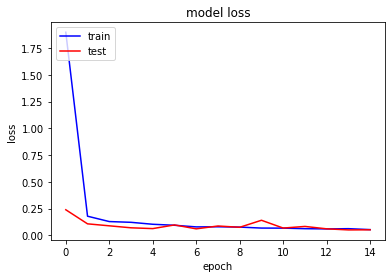

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color=  'red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
results = model.evaluate(test_dataset)

944/944 [==============================] - 1s 1ms/step - loss: 0.0509 - mse: 0.0509


In [57]:
print(results)

[0.05085746571421623, 0.05085746571421623]


In [13]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.Input((X_train.shape[1])),
    tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(25, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [17]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [18]:
history = model.fit(train_dataset, validation_data=test_dataset,epochs=15)

Epoch 1/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.9278 - mae: 0.5188 - val_loss: 0.2371 - val_mae: 0.3455
Epoch 2/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.2305 - mae: 0.3421 - val_loss: 0.1511 - val_mae: 0.2516
Epoch 3/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.1666 - mae: 0.2687 - val_loss: 0.1628 - val_mae: 0.2490
Epoch 4/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.1352 - mae: 0.2351 - val_loss: 0.1447 - val_mae: 0.2565
Epoch 5/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.1204 - mae: 0.2162 - val_loss: 0.1054 - val_mae: 0.1929
Epoch 6/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.1158 - mae: 0.2117 - val_loss: 0.0990 - val_mae: 0.1807
Epoch 7/15
3773/3773 [==============================] - 4s 1ms/step - loss: 0.1086 - mae: 0.2021 - val_loss: 0.0985 - val_mae: 0.1771
Epoch 8/15
3773/3773 [==============================] - 5s 1ms

In [19]:
results = model.evaluate(test_dataset)
print(results)

944/944 [==============================] - 1s 692us/step - loss: 0.0680 - mae: 0.1491
[0.0679691880941391, 0.14905160665512085]


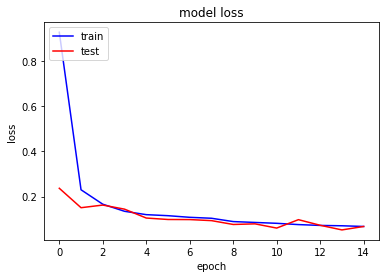

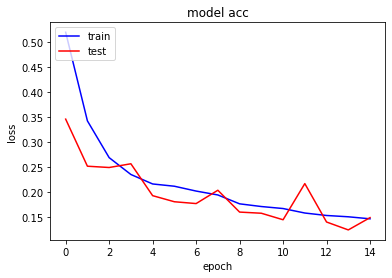

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color=  'red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['mae'], color = 'blue')
plt.plot(history.history['val_mae'], color=  'red')
plt.title('model acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()